# Lecture VI: Binary Trees, Linked Lists, Hash Tables


## Linked lists

- Linked lists: stuctures containing one (or more) values and a pointer to the next element of the list
- Double linked lists: as above, but with a pointer to the **previous** element too

Difference with a vector: each element is assigned separately, they are *not*  contiguos in memory, but they keep **exactly** the needed memory.

A list is by default a **sparse vector**; used also for **sparse matrixes**. A sparse matrix is one that contains zero in almost  all of its locations, so that allocating a normal matrix would be a waste of RAM.


This is an example:

In [ ]:
#include "stdio.h"
#include "stdlib.h"

struct mylist /* this is our definition of mylist */
    {
        float a;
        struct mylist *nextelement;
    };
    
    
main()
{
    struct mylist *first_element, *current_element;
    int i=0;
    
    first_element = (struct mylist*) malloc(sizeof(struct mylist));
    printf("enter the first value of the list: ");scanf("%f",&(first_element->a)); printf("\n");
    first_element->nextelement = NULL; /* useless but paranoid */

    /* ..here we do some operations on the 1st list element */    

    first_element->nextelement = (struct mylist*) malloc(sizeof(struct mylist)); /* allocating SECOND element */
    
    /* reding SECOND element */
    current_element = first_element->nextelement;
    printf("enter the second value of the list: ");scanf("%f",&(current_element->a)); printf("\n");
    current_element->nextelement = NULL;

    /* ...etc */
    
    /* browsing the list: */
    current_element=first_element;
    while(current_element!=NULL)
        {
            printf("Element: %d  value: %f\n",i, current_element->a);
            current_element = current_element->next_element;
        };


   /* note that we will need to FREE the elements in inverse order. How to do that? */
}

What follows is an example of a code using linked lists to create a **sparse matrix**. Try to give a look at it.

In [ ]:
typedef struct List_node
{
    int key;
    int i,j;
    struct List_node *next;
}List_node;

typedef struct List
{
    List_node *head;
}List;

List *create_list()
{
    List *list = (List*)malloc(sizeof(List));
    list->head = NULL;
    return list;
}

void insert_first(List_node *x, List *list)
{
    x->next = list->head;
    list->head = x;
}

void insert(List_node *x, List_node *y)
{
    x->next = y->next;
    y->next = x;
}

List_node *mk_node(int data, int row, int col)
{
    List_node *node = (List_node *)malloc(sizeof(List_node));
    node->key = data;
    node->i = row + 1;
    node->j = col + 1;
    return node;
}

void delete_list(List *list) 
{
    List_node *node, *temp;
    node = list->head;
    while (node != NULL) 
    {
        temp = node->next;
        free(node);
        node = temp;
    }
    free(list);
}

void print_list(List *list, char name)
{
    List_node *p;
    p = list->head;
    printf("\nThe linked list %c consists of: ",name);
    while (p != NULL)
    {
        printf("%d(i = %d) (j = %d) ", p->key, p->i, p->j);
        p = p->next;
    }
    printf("\n");
}

Note that a sparse matrix can be created **without** linked lists, using only arrays (try it!)

**Supplementary exercize 1:** Rewrite the program for the evaluation of PI, building two separate lists for points inside and outside the circle. Use the lists to print them out.


## Binary trees

A **binary tree** is a often-used data structure that is used to speed up **data search**.

Its structure is:
 - the data to be parsed
 - a pointer to a left child node;
 - a pointer to a right child node;
 - optionally, auxiliary data
 

For example, suppose we want to handle the more general problem of counting the occurrences of all the words in some input. 
Since the list of words isn’t known in advance, we can’t conveniently sort it and use a binary search. Yet *we can’t do a linear search for each word as it arrives, to see if it’s already been seen; the program would take too long*. (More precisely, its **running time** is likely to grow **quadratically** with the **number of input words**.) 

One solution is to keep the set of words seen so far sorted at all times, by placing each word into its proper position in the order as it arrives. This shouldn’t be done by shifting words in a linear array, though - that also takes too long. Instead we will use a data structure called a binary tree.

The tree contains one **node** per distinct word; each node contains
 - A pointer to the text of the word,
 - A count of the number of occurrences,
 - A pointer to the left child node,
 - A pointer to the right child node.

No node may have more than two children; it might have only zero or one.
** Important note: in scientific C, an often used structure is the *oct tree*, that divides a cubic portion of space in *eight* childrens**. We will see examples of this in the second module.

The nodes are maintained so that at any node the left subtree contains only words that are lexicographically less than the word at the node, and the right subtree contains only words that are greater. This is the tree for the sentence ‘‘now is the time for all good men to come to the aid of their party’’, as built by inserting each word as it is encountered:

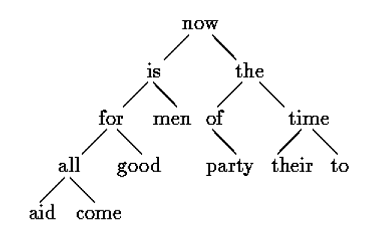

To find out whether a new word is already in the tree, start at the root and compare the new word to the word stored at that
node. If they match, the question is answered affirmatively. If the new record is less than the tree word, continue searching at
the left child, otherwise at the right child. If there is no child in the required direction, the new word is not in the tree, and in
fact the empty slot is the proper place to add the new word. This process is recursive, since the search from any node uses a
search from one of its children. Accordingly, recursive routines for insertion and printing will be most natural.
Going back to the description of a node, it is most conveniently represented as a structure with four components:

<code>
    struct tnode 
     { /* the tree node: */
        char *word; /* points to the text */
        int count; /* number of occurrences */
        struct tnode *left; /* left child */
        struct tnode *right; /* right child */
     };
    </code>

This recursive declaration of a node might look chancy, but it’s correct. It is illegal for a structure to contain an instance 
of itself, but `struct tnode *left;` declares left to be a **pointer** to a tnode, not a tnode itself.


Here we have the code:

In [ ]:
#include <stdio.h>
#include <ctype.h>
#include <string.h>
#define MAXWORD 100
struct tnode *addtree(struct tnode *, char *);

void treeprint(struct tnode *);
int getword(char *, int);

/* word frequency count */
main()
 {
    struct tnode *root;
    char word[MAXWORD];
    root = NULL;
    while (getword(word, MAXWORD) != EOF)
        if (isalpha(word[0]))
            root = addtree(root, word);
    treeprint(root);
return 0;
 }

*The function addtree is recursive.* 

A word is presented by main to the top level (the root) of the tree. At each stage, that word is compared to the word already stored at the node, and is percolated down to either the left or right subtree by a recursive call to adtree. **Eventually, the word either matches something already in the tree (in which case the count is incremented), or a null pointer is encountered, indicating that a node must be created and added to the tree**. If a new node is created, addtree returns a pointer to it, which is installed in the parent node.

In [ ]:
char *strdup(char *);
/* addtree: add a node with w, at or below p */

struct treenode *addtree(struct tnode *p, char *w)
 {
    int cond;
    if (p == NULL) 
        { /* a new word has arrived */
            p = talloc(); /* make a new node */
            p->word = strdup(w); /* this copies the string w in a memory area allocated via malloc and returns a pointer to it*/
            p->count = 1;
            p->left = p->right = NULL;
        } 
    else if ((cond = strcmp(w, p->word)) == 0) /* the word mathes at this level */
            p->count++;                        /* repeated word */
    else if (cond < 0)                         /* less than into left subtree */
            p->left = addtree(p->left, w);     /* recalls addtree for the left branch *//
    else                                       /* greater than into right subtree */
            p->right = addtree(p->right, w);   /* some thing for the right branch */
    return p;
}

Storage for the new node is fetched by a routine talloc, which returns a pointer to a free space suitable for holding a tree
node, and the new word is copied into a hidden space by strdup. (We will discuss these routines in a moment.) 

The count is initialized, and the two children are made null. This part of the code is executed only at the leaves of the tree, when a new node is being added. We have (unwisely) omitted error checking on the values returned by strdup and talloc.

treeprint prints the tree in sorted order; at each node, it prints the left subtree (all the words less than this word), then the word itself, then the right subtree (all the words greater). If you feel shaky about how recursion works, simulate treeprint as it operates on the tree shown above.

<code>
    /* treeprint: in-order print of tree p */
    void treeprint(struct tnode *p)
     {
        if (p != NULL) 
         {
            treeprint(p->left);
            printf("%4d %s\n", p->count, p->word);
            treeprint(p->right);
         }
     }
    </code>
    
A practical note: **if the tree becomes *unbalanced* because the words don’t arrive in random order, the running time of the
program can grow too much**. As a worst case, if the **words are already in order**, this program does an **expensive simulation of linear search**. 

The function talloc can be like this:

<code>
    #include <stdlib.h>
    /* talloc: make a tnode */
    struct tnode *talloc(void)
     {
        return (struct tnode *) malloc(sizeof(struct tnode));
     }
    </code>

Exercise 6-2. Write a program that reads a C program and prints in alphabetical order each group of variable names that are
identical in the first 6 characters, but different somewhere thereafter. Don’t count words within strings and comments. Make
6 a parameter that can be set from the command line.

Exercise 6-3. Write a cross-referencer that prints a list of all words in a document, and for each word, a list of the line
numbers on which it occurs. Remove noise words like ‘‘the,’’ ‘‘and,’’ and so on.

Exercise 6-4. Write a program that prints the distinct words in its input sorted into decreasing order of frequency of
occurrence. Precede each word by its count

**Supplementary exercize 2 :** Generate N random points in `[0,1)`. Create a binary tree that subdivides the segment in a left and right part, recursively. The final nodes of the tree must contain **one** only particle. Write an output function that prints the point out once ordered. Note that this is a mathematical version of the above word-sort code.

Write an alternative code that first creates the points and then sort them **linearly** (not with a qsort!). Measure the performance of the two codes with the command `time program.x`. 

Hint: do **not** use too many points at the beginning....!
 

## Table Lookup

**Hash tables** are another very used data structures used to speed-up the recovering of a given piece of data in a somewhat-ordered set.

In this section we will write the innards of a table-lookup package, to illustrate more aspects of structures. This code is typical of what might be found in the symbol table management routines of a macro processor or a compiler. 

For example, consider the #define statement. When a line like `#define IN 1` is encountered, the name IN and the replacement text 1 are stored in a table. Later, when the name IN appears in a statement like `state = IN;` it must be replaced by 1.

There are two routines that manipulate the names and replacement texts. `install(s,t)` records the name s and the
replacement text t in a table; s and t are just character strings. `lookup(s)` searches for s in the table, and returns a pointer to the place where it was found, or NULL if it wasn’t there.

The algorithm is a hash-search - **the incoming name is converted into a small non-negative integer, which is then used to index into an array of pointers**. An **array element** points to the **beginning of a linked list of blocks** describing names that have that hash value. It is NULL if no names have hashed to that value.

![lec7fig2.png](attachment:lec7fig2.png)

A block in the list is a structure containing pointers to the name, the replacement text, and the next block in the list. A null next-pointer marks the end of the list.

<code>
    struct nlist 
     { /* table entry: */
        struct nlist *next; /* next entry in chain */
        char *name; /* defined name */
        char *defn; /* replacement text */
     };
    </code>
The pointer array is just 

<code>
    #define HASHSIZE 101
    static struct nlist *hashtab[HASHSIZE]; /* pointer table */
</code>

The hashing function, which is used by both `lookup` and `install`, adds each character value in the string to a scrambled combination of the previous ones and returns the remainder modulo the array size. This is not the best possible hash function, but it is short and effective. **Note: this is simply used to generate an integer for the hash table!**

<code>
    /* hash: form hash value for string s */
    unsigned hash(char *s)
     {
        unsigned hashval;
        for (hashval = 0; *s != ’\0’; s++)
            hashval = *s + 31 * hashval; /* HERE we generate the integer */
        return hashval % HASHSIZE; /* THIS ensures that we only have numners between 0 and HASHSIZE-1 */
    }
    </code>

Unsigned arithmetic ensures that the hash value is non-negative. **Note that the hash value needs not to be unique**.

The hashing process produces a starting index in the array hashtab; **if the string is to be found anywhere, it will be in the list of blocks beginning there**. The search is performed by lookup. If `lookup` finds the entry already present, it returns a pointer to it; if not, it returns NULL.

<code>
    /* lookup: look for s in hashtab */
    struct nlist *lookup(char *s)
     {
        struct nlist *np;
        for (np = hashtab[hash(s)]; np != NULL; np = np->next)
            if (strcmp(s, np->name) == 0)
                return np; /* found */
        return NULL; /* not found */
     }
    </code>
    
The for loop in lookup is the standard idiom for walking along a linked list:
~~~text
for (ptr = head; ptr != NULL; ptr = ptr->next)
...
~~~

`install` uses lookup to determine whether the name being installed is already present; if so, the new definition will
supersede the old one. Otherwise, a new entry is created. install returns NULL if for any reason there is no room for a new
entry.

In [ ]:
struct nlist *lookup(char *);

char *strdup(char *);

/* install: put (name, defn) in hashtab */
struct nlist *install(char *name, char *defn)
 {
    struct nlist *np;
    unsigned hashval;
    if ((np = lookup(name)) == NULL)  /* not found */
     {
        np = (struct nlist *) malloc(sizeof(*np));
        if (np == NULL || (np->name = strdup(name)) == NULL)
            return NULL;
        hashval = hash(name);
        np->next = hashtab[hashval];
        hashtab[hashval] = np;
     } 
     else /* already there */
        free((void *) np->defn); /*free previous defn */
    if ((np->defn = strdup(defn)) == NULL)
        return NULL;
    return np;
 }

Obviously, a code can use `lookup` do get the string to be replaced and do the work.

Exercise 6-5. Write a function undef that will remove a name and definition from the table maintained by lookup and
install.

Exercise 6-6. Implement a simple version of the #define processor (i.e., no arguments) suitable for use with C programs,
based on the routines of this section. You may also find getch and ungetch helpful.

**Supplementary exercize 3:** On the repository you find a file "blocchi". It contains the LABEL of Gadget's binary output blocks and its meaning. Write a code that, using an hash table, takes in input the block name and outputs its meaning.

**Supplementary exercize 4**: Modify your binary tree code, so that generates the numbers, puts them in the binary tree, and then, for *one* number at the use's choice (between 0.0 and 1.0), prints the two closest generated numbers. Hint: use double linked lists, i.e. add a pointer to the PARENT tree node to make easier the tree walk. This structure is used very often in scientific C applications.
